In [16]:
import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [17]:
df = pd.read_csv('KAG_energydata_complete_2.csv', sep=',')
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('date', axis = 1)

cols = df.columns
df.describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,0.028194
std,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,0.028995
min,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.002778
25%,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,0.013889
50%,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,0.016667
75%,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,0.027778
max,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,0.308333


In [18]:
df2 = pd.read_csv('HomeC_3.csv', sep=',')
df2 = df2.drop('Unnamed: 0', axis = 1)

cols2 = ['temperature', 'pressure', 'humidity', 'windSpeed', 'visibility', 'dewPoint', 'House overall [kW]']
df2 = df2[cols2]

df2.describe()

,temperature,pressure,humidity,windSpeed,visibility,dewPoint,House overall [kW]
count,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000
mean,10.412186,762.288910,0.664085,2.972787,5.749824,3.718896,0.858962
std,10.617192,5.921434,0.194233,1.776022,0.998889,10.603960,0.928474
min,-24.800000,739.860846,0.130000,0.000000,0.167770,-32.911111,0.000800
25%,2.094444,758.533632,0.510500,1.636390,5.853317,-4.117222,0.398141
50%,10.183333,762.460205,0.680000,2.646477,6.213712,3.905556,0.613882
75%,19.033333,766.173010,0.836000,3.992067,6.213712,12.661111,1.002376
max,34.288889,781.909304,0.980000,10.241686,6.213712,24.161111,11.224978


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[cols[0:len(cols)-1]], df['HouseConsum'], test_size=0.3, random_state=1)

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[cols2[0:len(cols2)-1]], df2['House overall [kW]'], test_size=0.3, random_state=1)

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
regr = RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0)
regr.fit(X_train, y_train)
turned_R = regr.predict(X_test)
turned_Y = y_test

mae = mean_absolute_error(turned_Y,turned_R)
rmse = sqrt(mean_squared_error(turned_Y,turned_R))
rs = r2_score(turned_Y,turned_R)
mape = mean_absolute_percentage_error(turned_Y,turned_R)

print('Good Model','RMSE:', rmse, ' R^2:', rs, ' MAE:', mae, ' MAPE:', mape)

Good Model RMSE: 0.02529710609517305  R^2: 0.24174619956091803  MAE: 0.014415135392969394  MAPE: 59.53931013474851


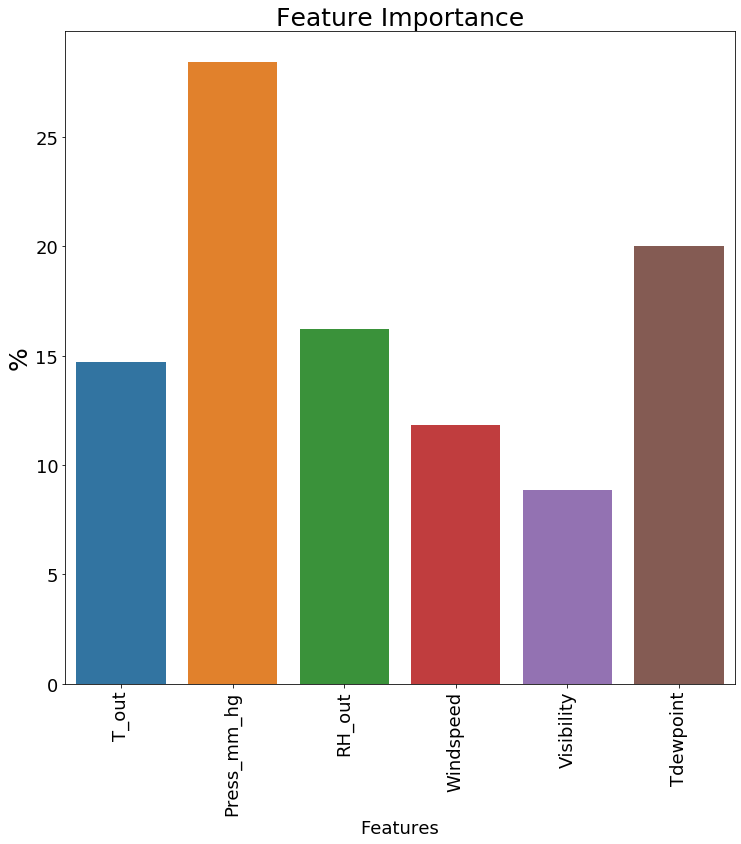

In [34]:
regr = RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0)
regr.fit(df[cols[0:len(cols)-1]], df['HouseConsum'])

importances = regr.feature_importances_*100

plt.figure(figsize=(12,12))
sns.barplot(cols[0:len(cols)-1],importances)
plt.xlabel('Features',fontsize=18, ha='center')
plt.ylabel('%',fontsize=25, ha='center')
plt.title('Feature Importance',fontsize=25, ha='center')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=18)
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/Feature_Importance.PNG')

In [35]:
regr = RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0)
regr.fit(X_train2, y_train2)
turned_R = regr.predict(X_test2)
turned_Y = y_test2

mae = mean_absolute_error(turned_Y,turned_R)
rmse = sqrt(mean_squared_error(turned_Y,turned_R))
rs = r2_score(turned_Y,turned_R)
mape = mean_absolute_percentage_error(turned_Y,turned_R)

print('Good Model','RMSE:', rmse, ' R^2:', rs, ' MAE:', mae, ' MAPE:', mape)

Good Model RMSE: 0.74293357457574  R^2: 0.36808086528107586  MAE: 0.437444439315743  MAPE: 154.59496261642417


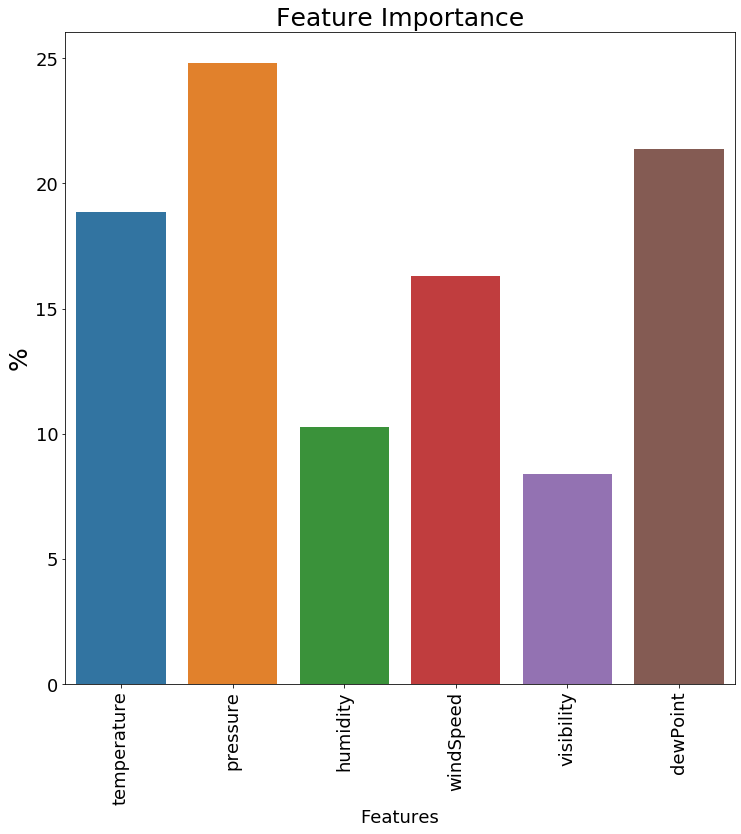

In [36]:
regr = RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0)
regr.fit(df2[cols2[0:len(cols2)-1]], df2['House overall [kW]'])

importances = regr.feature_importances_*100

plt.figure(figsize=(12,12))
sns.barplot(cols2[0:len(cols2)-1],importances)
plt.xlabel('Features',fontsize=18, ha='center')
plt.ylabel('%',fontsize=25, ha='center')
plt.title('Feature Importance',fontsize=25, ha='center')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=18)
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/Feature_Importance_2.PNG')